In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_path = '/Users/barnana/Downloads/Deepfake_Project/deepfake-image-detection-master/deepfake-image-detection-master/archive/real_vs_fake/real-vs-fake'
image_gen = ImageDataGenerator(rescale=1./255.)

train_flow = image_gen.flow_from_directory(
    base_path + '/train/',
    target_size=(224, 224),
    batch_size=64,
    shuffle=False,
    class_mode='binary'
)

test_flow = image_gen.flow_from_directory(
    base_path + '/test/',
    target_size=(224, 224),
    batch_size=1,
    shuffle = False,
    class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [3]:
y_test = test_flow.classes

In [6]:
## update train flow and test flow to use grayscale color mode
gs_train_flow = image_gen.flow_from_directory(
    base_path + '/train/',
    target_size=(224, 224),
    batch_size=64,
    color_mode='grayscale',
    class_mode='binary'
)

gs_test_flow = image_gen.flow_from_directory(
    base_path + '/test/',
    target_size=(224, 224),
    batch_size=1,
    color_mode='grayscale',
    shuffle = False,
    class_mode='binary'
)

gs_ytest = gs_test_flow.classes

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [7]:
# Load the models
Custom_CNN_model = load_model('/Users/barnana/Downloads/Deepfake_Project/deepfake-image-detection-master/deepfake-image-detection-master/models/Custom_CNN_model.h5')
DenseNet_model = load_model('/Users/barnana/Downloads/Deepfake_Project/deepfake-image-detection-master/deepfake-image-detection-master/models/DenseNet_model.h5')
DenseNet_Augmented_model = load_model('/Users/barnana/Downloads/Deepfake_Project/deepfake-image-detection-master/deepfake-image-detection-master/models/DenseNet_Augmented_model.h5')
DenseNet_Grayscale_model = load_model('/Users/barnana/Downloads/Deepfake_Project/deepfake-image-detection-master/deepfake-image-detection-master/models/DenseNet_Grayscale_model.h5')

In [8]:
y_pred_Custom_CNN_model = Custom_CNN_model.predict(test_flow)
y_pred_DenseNet_model = DenseNet_model.predict(test_flow)
y_pred_DenseNet_Augmented_model = DenseNet_Augmented_model.predict(test_flow)


20000/20000 [==============================] - 3493s 174ms/step


UnimplementedError: Graph execution error:

Detected at node sequential/densenet121/conv1/relu/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/barnana/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/barnana/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/barnana/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/vl/q57w49ys18v2dbmv_5lg2wth0000gn/T/ipykernel_57081/2916645429.py", line 4, in <module>

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2655, in predict

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/activation.py", line 59, in call

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/Users/barnana/anaconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5395, in relu

Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential/densenet121/conv1/relu/Relu}}]] [Op:__inference_predict_function_536387]

In [9]:
y_pred_DenseNet_Grayscale_model = DenseNet_Grayscale_model.predict(gs_test_flow)

20000/20000 [==============================] - 4351s 218ms/step


## Comparison

In [10]:
Custom_CNN_model_fpr, Custom_CNN_model_tpr, _ = metrics.roc_curve(y_test, y_pred_Custom_CNN_model)
Custom_CNN_model_roc_auc = metrics.auc(Custom_CNN_model_fpr, Custom_CNN_model_tpr)

DenseNet_model_fpr, DenseNet_model_tpr, _ = metrics.roc_curve(y_test, y_pred_DenseNet_model)
DenseNet_model_roc_auc = metrics.auc(DenseNet_model_fpr, DenseNet_model_tpr)

DenseNet_Augmented_model_fpr, DenseNet_Augmented_model_tpr, _ = metrics.roc_curve(y_test, y_pred_DenseNet_Augmented_model)
DenseNet_Augmented_model_roc_auc = metrics.auc(DenseNet_Augmented_model_fpr, DenseNet_Augmented_model_tpr)

DenseNet_Grayscale_model_fpr, DenseNet_Grayscale_model_tpr, _ = metrics.roc_curve(gs_ytest, y_pred_DenseNet_Grayscale_model)
DenseNet_Grayscale_model_roc_auc = metrics.auc(DenseNet_Grayscale_model_fpr, DenseNet_Grayscale_model_tpr)

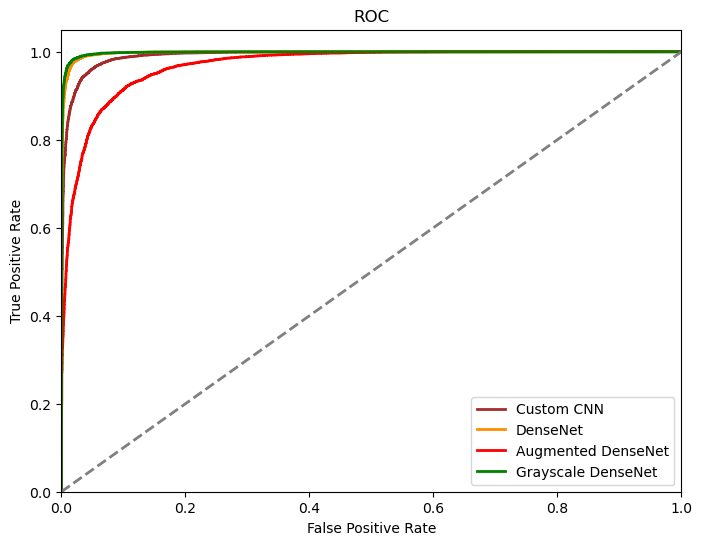

In [13]:
plt.figure(figsize=(8,6))
lw = 2
plt.plot(Custom_CNN_model_fpr, Custom_CNN_model_tpr, color='brown', lw=lw, label='Custom CNN' % Custom_CNN_model_roc_auc)

plt.plot(DenseNet_model_fpr, DenseNet_model_tpr, color='darkorange', lw=lw, label='DenseNet' % DenseNet_model_roc_auc)

plt.plot(DenseNet_Augmented_model_fpr, DenseNet_Augmented_model_tpr, color='red', lw=lw, label='Augmented DenseNet' % DenseNet_Augmented_model_roc_auc)

plt.plot(DenseNet_Grayscale_model_fpr, DenseNet_Grayscale_model_tpr, color='green', lw=lw, label='Grayscale DenseNet' % DenseNet_Grayscale_model_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

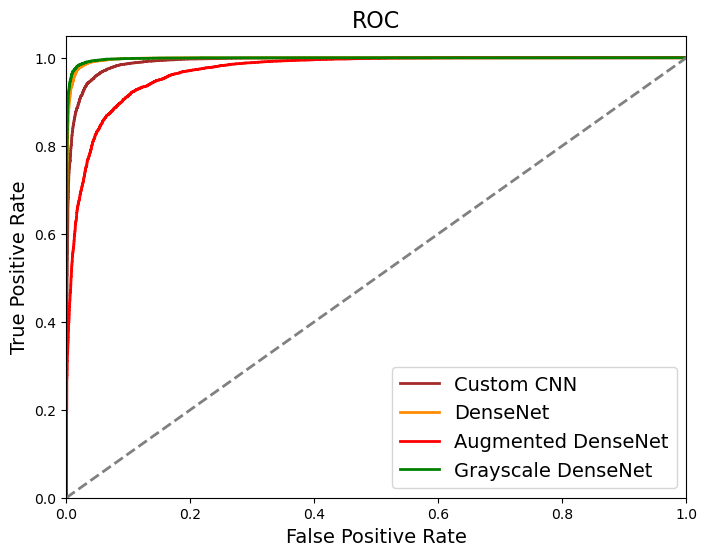

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
lw = 2

# Plotting the curves
plt.plot(Custom_CNN_model_fpr, Custom_CNN_model_tpr, color='brown', lw=lw, label='Custom CNN')
plt.plot(DenseNet_model_fpr, DenseNet_model_tpr, color='darkorange', lw=lw, label='DenseNet')
plt.plot(DenseNet_Augmented_model_fpr, DenseNet_Augmented_model_tpr, color='red', lw=lw, label='Augmented DenseNet')
plt.plot(DenseNet_Grayscale_model_fpr, DenseNet_Grayscale_model_tpr, color='green', lw=lw, label='Grayscale DenseNet')

# Adding the diagonal line
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')

# Setting the axes limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Increasing font size for the axes labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC', fontsize=16)

# Adding legend
plt.legend(loc="lower right", fontsize=14)

plt.show()
